**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
D:\Python\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWa

### Check no.of records and features given in each dataset

In [3]:
books.shape

(271360, 8)

In [4]:
users.shape

(278858, 3)

In [5]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [6]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [7]:
books=books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1)

In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [9]:
list(set(books.yearOfPublication))

[0,
 2050,
 '1924',
 '1933',
 '1960',
 '1983',
 '1900',
 '1965',
 '1942',
 '1923',
 '2030',
 '2011',
 '1999',
 '1967',
 '1979',
 '1963',
 '1996',
 '1911',
 '1950',
 '1938',
 '1931',
 '1956',
 '1962',
 'Gallimard',
 '0',
 '1920',
 '1968',
 '1922',
 '1985',
 '1953',
 '1932',
 '1949',
 '1980',
 '2002',
 '2020',
 '1998',
 '1909',
 '1927',
 '1946',
 '1919',
 '1957',
 '1978',
 '1991',
 '1984',
 '1972',
 '1941',
 '1959',
 '1986',
 '2024',
 'DK Publishing Inc',
 '1970',
 '1958',
 '1975',
 '1994',
 '1948',
 '1961',
 '1982',
 1806,
 '1964',
 '1930',
 '1971',
 '2006',
 '1974',
 '2037',
 '2001',
 '1944',
 '1378',
 '2005',
 '2004',
 '1940',
 '1376',
 '1992',
 '1969',
 '1936',
 '1976',
 '1995',
 '1987',
 '1997',
 '1990',
 '1926',
 '2008',
 '1954',
 '1951',
 '1945',
 '1966',
 '1977',
 '1952',
 '1981',
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 '1939',
 1910,
 1911,
 '1955',
 '1897',
 1914,
 1917,
 1920,
 1921,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,


In [10]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [11]:
books[books['yearOfPublication']=='DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [12]:
books[books['yearOfPublication']=='Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [13]:
books=books[books['yearOfPublication']!='DK Publishing Inc']

In [14]:
books=books[books['yearOfPublication']!='Gallimard']

In [15]:
books.shape # 3 rows are dropped having 'DK Publishing Inc' and 'Gallimard' as yearOfPublication

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [16]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int')

In [17]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [18]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [19]:
books[books['publisher'].isnull()==True]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [20]:
books=books.dropna()

In [21]:
books[books['publisher'].isnull()==True]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


## Exploring Users dataset

In [22]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

### Get all unique values in ascending order for column `Age`

In [24]:
a = users['Age'].unique()
a.sort()
print(a)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 113. 114. 115. 116. 118. 119. 123. 124. 127. 128. 132. 133. 136. 137.
 138. 140. 141. 143. 146. 147. 148. 151. 152. 156. 157. 159. 162. 168.
 172. 175. 183. 186. 189. 199. 200. 201. 204. 207. 208. 209. 210. 212.
 219. 220. 223. 226. 228. 229. 230. 231. 237. 239. 244.  nan]


Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [25]:
users.loc[(users['Age']<5) | (users['Age']>90), 'Age']=np.nan

### Replace null values in column `Age` with mean

In [26]:
users['Age']=users['Age'].fillna(users['Age'].mean())

In [27]:
b = users['Age'].unique()
b.sort()
print(b)

[ 5.          6.          7.          8.          9.         10.
 11.         12.         13.         14.         15.         16.
 17.         18.         19.         20.         21.         22.
 23.         24.         25.         26.         27.         28.
 29.         30.         31.         32.         33.         34.
 34.72384042 35.         36.         37.         38.         39.
 40.         41.         42.         43.         44.         45.
 46.         47.         48.         49.         50.         51.
 52.         53.         54.         55.         56.         57.
 58.         59.         60.         61.         62.         63.
 64.         65.         66.         67.         68.         69.
 70.         71.         72.         73.         74.         75.
 76.         77.         78.         79.         80.         81.
 82.         83.         84.         85.         86.         87.
 88.         89.         90.        ]


### Change the datatype of `Age` to `int`

In [28]:
users['Age'] = users['Age'].astype('int')

In [29]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [30]:
ratings.shape

(1149780, 3)

In [31]:
n_users = users.shape[0]
n_books = books.shape[0]

In [32]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [33]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [34]:
#books and ratings dataset have "ISBN" as common column so separating books which have common isbn in both datasets

In [35]:
ratings['ISBN'].isin(books['ISBN'])

0           True
1           True
2           True
3           True
4           True
5           True
6          False
7          False
8           True
9          False
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21          True
22          True
23          True
24          True
25         False
26         False
27          True
28          True
29          True
           ...  
1149750     True
1149751     True
1149752     True
1149753     True
1149754     True
1149755     True
1149756     True
1149757     True
1149758    False
1149759     True
1149760     True
1149761     True
1149762     True
1149763     True
1149764     True
1149765     True
1149766     True
1149767     True
1149768     True
1149769     True
1149770     True
1149771     True
1149772     True
1149773     True
1149774     True
1149775     True
1149776     True
1149777     Tr

In [36]:
ratings_df=ratings[ratings['ISBN'].isin(books['ISBN'])]

In [37]:
ratings_df.shape

(1031129, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [38]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [39]:
ratings_df.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [40]:
ratings_df.shape

(1031129, 3)

In [41]:
users.shape

(278858, 3)

In [ ]:
#users and ratings dataset have "userID" as common column so separating books which have common userID in both datasets

In [42]:
ratings_df['userID'].isin(users['userID'])

0          True
1          True
2          True
3          True
4          True
5          True
8          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
27         True
28         True
29         True
31         True
32         True
33         True
34         True
35         True
           ... 
1149748    True
1149749    True
1149750    True
1149751    True
1149752    True
1149753    True
1149754    True
1149755    True
1149756    True
1149757    True
1149759    True
1149760    True
1149761    True
1149762    True
1149763    True
1149764    True
1149765    True
1149766    True
1149767    True
1149768    True
1149769    True
1149770    True
1149771    True
1149772    True
1149773    True
1149774    True
1149775    True
1149776    True
1149777    True
1149778    True
Name: userID, Length: 10

In [43]:
p=ratings_df['userID'].isin(users['userID'])

In [44]:
p[p==False]

Series([], Name: userID, dtype: bool)

In [45]:
ratings_df=ratings_df[ratings_df['userID'].isin(users['userID'])]

In [46]:
ratings_df.shape

(1031129, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [47]:
ratings_df['bookRating']

0           0
1           5
2           0
3           3
4           6
5           0
8           7
10          0
11          0
12          0
13          0
14          0
15          0
16          9
17          0
18          0
19          9
20          8
21          7
22          0
23          7
24          6
27          8
28          8
29          5
31          0
32          0
33          5
34          0
35          0
           ..
1149748     0
1149749     0
1149750     0
1149751     0
1149752     0
1149753     0
1149754     0
1149755     0
1149756     0
1149757     0
1149759     0
1149760     0
1149761     6
1149762     5
1149763     0
1149764     0
1149765     0
1149766     0
1149767     0
1149768     0
1149769     0
1149770     0
1149771     7
1149772     0
1149773     5
1149774     0
1149775     9
1149776     0
1149777    10
1149778    10
Name: bookRating, Length: 1031129, dtype: int64

In [48]:
ratings_df=ratings_df[ratings_df['bookRating']!=0]

In [49]:
ratings_df['bookRating']

1           5
3           3
4           6
8           7
16          9
19          9
20          8
21          7
23          7
24          6
27          8
28          8
29          5
33          5
44          8
59          7
61         10
62         10
66          9
77          8
81          6
83          8
84          7
85         10
86          5
88          5
90          7
97          6
105         7
109         8
           ..
1149685    10
1149690     2
1149697     7
1149703     8
1149704     9
1149705     8
1149709    10
1149711     6
1149713     7
1149714     7
1149715     6
1149717     2
1149719     6
1149728    10
1149729    10
1149738     8
1149739    10
1149741     7
1149743    10
1149744    10
1149745    10
1149746     6
1149747     7
1149761     6
1149762     5
1149771     7
1149773     5
1149775     9
1149777    10
1149778    10
Name: bookRating, Length: 383838, dtype: int64

### Find out which rating has been given highest number of times

In [50]:
ratings_df['bookRating'].unique()

array([ 5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [51]:
ratings_df['bookRating'].value_counts()

8     91803
10    71225
7     66401
9     60776
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

In [52]:
import seaborn as sns

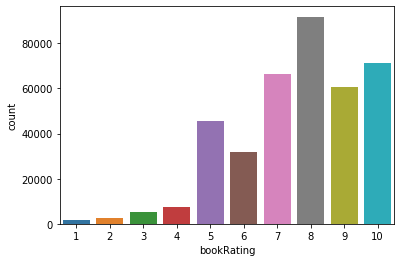

In [53]:
sns.countplot(data=ratings_df,x='bookRating')

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [54]:
ratings_df.head()

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [55]:
ratings_df['userID'].value_counts()

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      837
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
93047      501
69078      499
182085     498
135149     487
100906     484
107784     482
78973      479
23872      478
60244      476
257204     475
          ... 
216045       1
211939       1
251025       1
177106       1
173008       1
142273       1
123832       1
81059        1
83116        1
89263        1
267369       1
44433        1
42384        1
23951        1
33787        1
13698        1
269575       1
265477       1
261371       1
214252       1
109745       1
195803       1
179411       1
154831       1
152782       1
148684       1
124088       1
105655       1
103606       1
211175       1
Name: userID, Length: 68091, dtype: int64

In [56]:
# To consider users who have rated atleast 100 books

In [57]:
ratings_df=ratings_df

In [58]:
o=ratings_df['userID'].value_counts()

In [59]:
ratings_df[ratings_df['userID'].isin(o[o>=100].index)]

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
1477,277427,0062507109,8
1483,277427,0132220598,8
1488,277427,0140283374,6
1490,277427,014039026X,8
1491,277427,0140390715,7


In [60]:
o.head()

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
Name: userID, dtype: int64

In [61]:
ratings_df=ratings_df[ratings_df['userID'].isin(o[o>=100].index)]

In [62]:
ratings_df[ratings_df['userID'].isin(o[o>=100])]

,userID,ISBN,bookRating


In [63]:
ratings_df.shape

(103269, 3)

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [117]:
ratings_matrix=ratings_df.pivot(index='ISBN',columns='userID',values='bookRating')

In [118]:
ratings_matrix.shape

(66572, 449)

In [119]:
ratings_matrix.head()

userID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001046438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000104687X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001047213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001047973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
ratings_matrix=ratings_matrix.fillna(0)

In [121]:
ratings_matrix.head()

userID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001046438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000104687X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001047213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001047973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [142]:
from surprise.dataset import Dataset,DatasetAutoFolds
from surprise import Reader
from surprise.prediction_algorithms.matrix_factorization import SVD

In [146]:
reader = Reader(rating_scale=(ratings_df['bookRating'].min(), ratings_df['bookRating'].max()))
trainset = Dataset.load_from_df(ratings_df,reader)

In [147]:
svd_algo = SVD()
svd_algo.fit(trainset.build_full_trainset())

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [150]:
userID = 2110

In [151]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [152]:
s = []
for each_isbn in books['ISBN']:
    s.append([each_isbn,round(svd_algo.predict(userID,each_isbn).est)]) 

In [154]:
predicted_df = pd.DataFrame(columns=['ISBN','Predicted_rating'],data=s)
predicted_df.head()

,ISBN,Predicted_rating
0,0195153448,8.0
1,0002005018,8.0
2,0060973129,8.0
3,0374157065,9.0
4,0393045218,8.0


### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [155]:
user_data=trainset.df[trainset.df['userID']==2110]


In [156]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [157]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [158]:
user_full_info = user_data.merge(on='ISBN',right=books)

In [159]:
book_data=user_full_info.drop(columns=['userID','bookRating'],axis=1)

In [160]:
book_data.shape

(103, 5)

In [161]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0060987529,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
2,0140022651,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,0142302163,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,0151008116,Life of Pi,Yann Martel,2002,Harcourt


In [162]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [163]:
not_rated = pd.concat([books,book_data]).drop_duplicates(keep=False)

In [164]:
not_rated=not_rated.merge(right=predicted_df,on='ISBN')

In [166]:
not_rated.nlargest(10,columns='Predicted_rating')

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Predicted_rating
355,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,10.0
3144,0312971346,High Five (A Stephanie Plum Novel),Janet Evanovich,2000,St. Martin's Paperbacks,10.0
4731,1931561648,The Time Traveler's Wife (Today Show Book Club...,Audrey Niffenegger,2003,MacAdam/Cage Publishing,10.0
5382,0671041789,The Green Mile,Stephen King,1999,Pocket,10.0
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,10.0
12949,0345310020,Chronicle of a Death Foretold,GABRIEL GARCIA MARQUEZ,1984,Ballantine Books,10.0
15129,0836218523,The Calvin &amp; Hobbes Lazy Sunday Book,Bill Watterson,1989,Andrews McMeel Publishing,10.0
16157,156402976X,Catkin,Antonia Barber,1996,Candlewick Press (MA),10.0
30640,0743454529,"My Sister's Keeper : A Novel (Picoult, Jodi)",Jodi Picoult,2004,Atria,10.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,9.0
